In [5]:
import cv2

In [6]:
import matplotlib.pyplot as plt

In [7]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [8]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [9]:
classLabels = []
file_name ='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [10]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [12]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,125.7))
model.setInputSwapRB(True)


< cv2.dnn.Model 000001F1126B60D0>

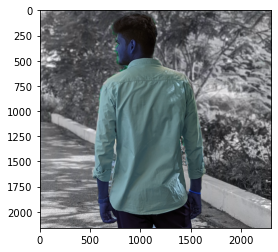

In [13]:
img = cv2.imread('edit1.jpg')
plt.imshow(img)

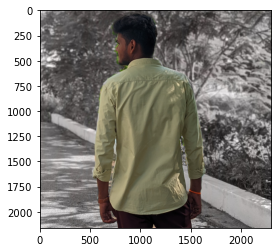

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
classIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [15]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
    #cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    #cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale+font_scale,color=(0,0,0),thickness=1))
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

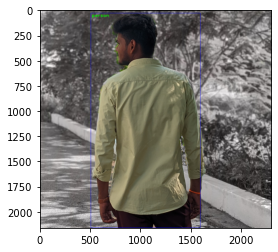

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture("dace.mp4")
#Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    classIndex, confidence, bbox = model.detect(frame,confThreshold=0.5)
    
    print(classIndex)
    if(len(classIndex)!=0):
        for classInd, conf, boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
            if(classInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness=3)
                
    cv2.imshow('object',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()